In [2]:
import pandas as pd
import numpy as np
import math

# Replace 'your_data.csv' with the actual file path
csv_file_path = '/Users/julianesler/Downloads/czoradiationmodified.csv'

# Read CSV into DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame to check if the import was successful
df


,Year,Month,Day,Hour,GHI
0,2021,1,1,0,2
1,2021,1,1,1,0
2,2021,1,1,2,0
3,2021,1,1,3,0
4,2021,1,1,4,0
...,...,...,...,...,...
8755,2021,12,31,19,483
8756,2021,12,31,20,520
8757,2021,12,31,21,463
8758,2021,12,31,22,340


In [3]:
print(df['GHI'].max())
print(df['GHI'].min())

1113
0


In [4]:
df['nGHI'] = df['GHI']/1113
df

,Year,Month,Day,Hour,GHI,nGHI
0,2021,1,1,0,2,0.001797
1,2021,1,1,1,0,0.000000
2,2021,1,1,2,0,0.000000
3,2021,1,1,3,0,0.000000
4,2021,1,1,4,0,0.000000
...,...,...,...,...,...,...
8755,2021,12,31,19,483,0.433962
8756,2021,12,31,20,520,0.467206
8757,2021,12,31,21,463,0.415993
8758,2021,12,31,22,340,0.305481


In [5]:
# Group by "Month" and "Day" columns and aggregate values into lists
grouped_df = df.groupby(['Month', 'Hour'])['nGHI'].agg(list).reset_index()

# Create a new DataFrame "gdfh" (gdfh = grouped data frame, hour) with the desired structure
gdfh = pd.DataFrame({
    'MonthL': grouped_df['Month'],
    'HourL': grouped_df['Hour'],
    'GHI_list': grouped_df['nGHI']
})

# Display the new DataFrame "gdfh"
gdfh

,MonthL,HourL,GHI_list
0,1,0,"[0.0017969451931716084, 0.015274034141958671, ..."
1,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
283,12,19,"[0.5193171608265947, 0.5139263252470799, 0.513..."
284,12,20,"[0.49326145552560646, 0.49056603773584906, 0.4..."
285,12,21,"[0.4141958670260557, 0.4132973944294699, 0.413..."
286,12,22,"[0.29020664869721474, 0.29020664869721474, 0.2..."


In [6]:
gdfh['GHI_daily_avg'] = gdfh['GHI_list'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

gdfh

,MonthL,HourL,GHI_list,GHI_daily_avg
0,1,0,"[0.0017969451931716084, 0.015274034141958671, ...",0.035214
1,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000
2,1,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000
3,1,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000
4,1,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000
...,...,...,...,...
283,12,19,"[0.5193171608265947, 0.5139263252470799, 0.513...",0.363244
284,12,20,"[0.49326145552560646, 0.49056603773584906, 0.4...",0.377793
285,12,21,"[0.4141958670260557, 0.4132973944294699, 0.413...",0.340956
286,12,22,"[0.29020664869721474, 0.29020664869721474, 0.2...",0.228908


In [7]:
alpha_df = gdfh.groupby(['MonthL'])['GHI_daily_avg'].agg(list).reset_index()

# Create a new DataFrame "gdf" with the desired structure
agdf = pd.DataFrame({
    'Month': alpha_df['MonthL'],
    'GHI': alpha_df['GHI_daily_avg']
})
agdf

,Month,GHI
0,1,"[0.03521432918876619, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,2,"[0.10922859709921702, 0.0044602746759081, 0.0,..."
2,3,"[0.21172071993739677, 0.03776483204359041, 0.0..."
3,4,"[0.2956573824498353, 0.10137765798143158, 0.00..."
4,5,"[0.3547517607164594, 0.1674347158218126, 0.023..."
5,6,"[0.376669661575322, 0.19982030548068286, 0.054..."
6,7,"[0.3469553372170536, 0.1720719937396748, 0.044..."
7,8,"[0.30594441063095956, 0.13433614468307103, 0.0..."
8,9,"[0.20467205750224618, 0.04558250973345313, 0.0..."
9,10,"[0.07500797032142131, 0.0005216937657594992, 0..."


In [8]:
print(len(agdf.loc[0,'GHI']))

24


In [22]:

ds = pd.DataFrame(agdf['GHI'].tolist(), columns=range(1, 25))

# Transpose the DataFrame to have hours as columns and months as rows
ds = ds.T

# Rename the columns with month names
ds.columns = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

ds.reset_index(inplace=True)
# Display the new DataFrame "ds", ds = data spread

ds = ds.drop(columns='index')

# hashtag inserted before ds in following line so that dataframe does not print.
# I did this so the code is more easily intelligible in GitHub. Remove # to print the dataframe.
#ds

In [21]:
# Columns in ds before the below modification is made are order with the index representing the hour of the day. 
# The timezone of this data is GMT 00:00, or UTC. The local timezone is UTC -7
# This line of code moves the first 7 rows ds to the bottom of the data frame. 
for column in ds.columns:
    ds[column] = np.concatenate([ds[column].iloc[7:], ds[column].iloc[:7]])
ds

,January,February,March,April,May,June,July,August,September,October,November,December
0,0.000000,0.004621,0.061154,0.195328,0.281367,0.296676,0.229139,0.197954,0.131357,0.064632,0.010003,0.000000
1,0.050430,0.110512,0.200910,0.381941,0.456047,0.465858,0.414109,0.383416,0.302096,0.211170,0.127972,0.053416
2,0.178622,0.256931,0.339594,0.567236,0.610295,0.634831,0.591195,0.549575,0.431267,0.385793,0.280234,0.146480
3,0.304003,0.400494,0.485088,0.679305,0.724372,0.779335,0.719039,0.690954,0.522701,0.497522,0.406379,0.247457
4,0.385966,0.520151,0.623801,0.782929,0.807553,0.850255,0.805176,0.787497,0.621983,0.611860,0.475801,0.324465
5,0.436165,0.587376,0.681854,0.857233,0.836710,0.886433,0.857751,0.830073,0.690955,0.630699,0.518688,0.363244
6,0.442831,0.582627,0.685187,0.841599,0.812248,0.839173,0.857925,0.776802,0.705690,0.601049,0.499281,0.377793
7,0.390343,0.511744,0.619685,0.751063,0.792105,0.808895,0.732052,0.712431,0.647379,0.517028,0.416562,0.340956
8,0.296699,0.408613,0.527258,0.645972,0.667739,0.694879,0.628119,0.607223,0.513028,0.404255,0.300839,0.228908
9,0.172797,0.252407,0.386169,0.475771,0.519317,0.541120,0.534997,0.470394,0.380443,0.238530,0.150584,0.110425


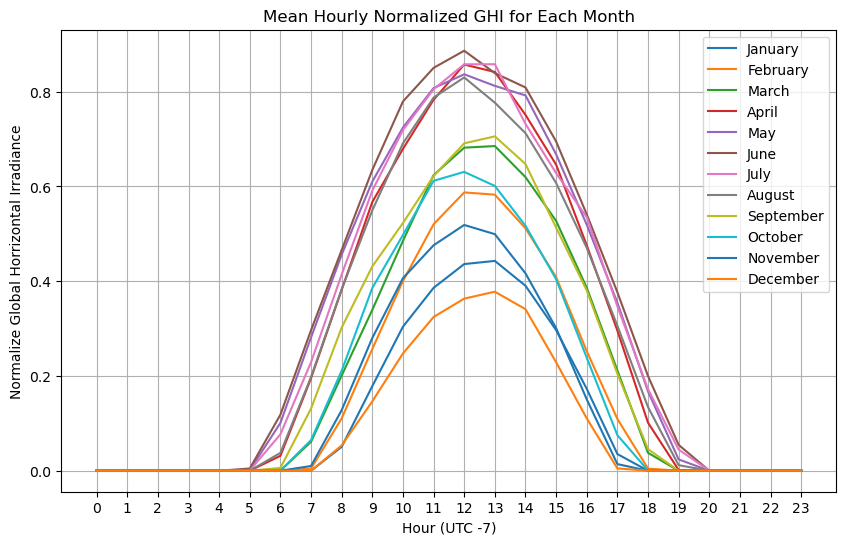

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each column
for column in ds.columns:
    ax.plot(ds.index, ds[column], label=column)

# Adding labels and legend
ax.set_title('Mean Hourly Normalized GHI for Each Month')
ax.set_xlabel('Hour (UTC -7)')
ax.set_ylabel('Normalize Global Horrizontal Irradiance')
ax.grid(True)
ax.legend()

ax.set_xticks(ds.index)

plt.show()